In [1]:
import pandas as pd
import plotly
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [2]:
home_values = pd.read_csv('Zip_Zhvi_AllHomes.csv', encoding="ISO-8859-1")
home_values.head()

RegionID  RegionName      City State                             Metro  \
0     61639       10025  New York    NY       New York-Newark-Jersey City   
1     84654       60657   Chicago    IL          Chicago-Naperville-Elgin   
2     61637       10023  New York    NY       New York-Newark-Jersey City   
3     91982       77494      Katy    TX  Houston-The Woodlands-Sugar Land   
4     84616       60614   Chicago    IL          Chicago-Naperville-Elgin   

        CountyName  SizeRank   1996-04   1996-05   1996-06  ...  2018-07  \
0  New York County         1  168300.0  168400.0  168400.0  ...  1096600   
1      Cook County         2  160000.0  161000.0  161700.0  ...   346900   
2  New York County         3  353100.0  353700.0  354200.0  ...  1460200   
3    Harris County         4  210400.0  212200.0  212200.0  ...   336800   
4      Cook County         5  194400.0  196100.0  197300.0  ...   429600   

   2018-08  2018-09  2018-10  2018-11  2018-12  2019-01  2019-02  2019-03  \
0  1084600  1079300  1072000  1064600  1049300  1024800  1008400   999100   
1   347200   348500   350500   352500   352800   352600   352800   352100   
2  1436000  1411000  1390900  1379600  1370600  1361700  1358400  1350000   
3   338100   338500   337200   336200   336100   335300   334000   333400   
4   430700   429800   429900   431300   431900   432000   431700   430100   

   2019-04  
0   985100  
1   350200  
2  1334100  
3   333200  
4   428200  

[5 rows x 284 columns]

In [3]:
home_values[home_values['RegionName'] == 98117]

RegionID  RegionName     City State                    Metro  \
2198     99577       98117  Seattle    WA  Seattle-Tacoma-Bellevue   

       CountyName  SizeRank   1996-04   1996-05   1996-06  ...  2018-08  \
2198  King County      2199  165300.0  165900.0  166500.0  ...   791900   

      2018-09  2018-10  2018-11  2018-12  2019-01  2019-02  2019-03  2019-04  \
2198   790100   788200   785900   785500   786700   785400   782100   777700   

      2019-05  
2198   772200  

[1 rows x 285 columns]

In [3]:
def prophet_df_from_zillow_row(row):
    row = row.copy()
    row = row.T
    row = row.drop(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'])
    row = row.reset_index()
    row = row.rename(columns={'index': 'ds', list(row)[1]: 'y'})
    row['ds'] = pd.to_datetime(row['ds'])
    return row
    
prophet_row = prophet_df_from_zillow_row(home_values[home_values['RegionName'] == 98117])

In [4]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(prophet_row)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [5]:
future = m.make_future_dataframe(periods=120, freq='M')
future.tail()

ds
392 2028-11-30
393 2028-12-31
394 2029-01-31
395 2029-02-28
396 2029-03-31

In [6]:
forecast = m.predict(future)
forecast.tail()

ds         trend    yhat_lower    yhat_upper   trend_lower  \
392 2028-11-30  1.548261e+06  1.281620e+06  1.848407e+06  1.275452e+06   
393 2028-12-31  1.554398e+06  1.278468e+06  1.848676e+06  1.279356e+06   
394 2029-01-31  1.560535e+06  1.282707e+06  1.856187e+06  1.282875e+06   
395 2029-02-28  1.566078e+06  1.286599e+06  1.866006e+06  1.283949e+06   
396 2029-03-31  1.572215e+06  1.253285e+06  1.826937e+06  1.286153e+06   

      trend_upper  multiplicative_terms  multiplicative_terms_lower  \
392  1.841453e+06              0.001484                    0.001484   
393  1.850589e+06             -0.001998                   -0.001998   
394  1.860902e+06             -0.001875                   -0.001875   
395  1.869426e+06             -0.003563                   -0.003563   
396  1.879524e+06             -0.029899                   -0.029899   

     multiplicative_terms_upper    yearly  yearly_lower  yearly_upper  \
392                    0.001484  0.001484      0.001484      0.001484   
393                   -0.001998 -0.001998     -0.001998     -0.001998   
394                   -0.001875 -0.001875     -0.001875     -0.001875   
395                   -0.003563 -0.003563     -0.003563     -0.003563   
396                   -0.029899 -0.029899     -0.029899     -0.029899   

     additive_terms  additive_terms_lower  additive_terms_upper          yhat  
392             0.0                   0.0                   0.0  1.550559e+06  
393             0.0                   0.0                   0.0  1.551292e+06  
394             0.0                   0.0                   0.0  1.557610e+06  
395             0.0                   0.0                   0.0  1.560498e+06  
396             0.0                   0.0                   0.0  1.525207e+06

In [10]:
fig = plt.figure(figsize=(15,8), dpi=1000)
ax = fig.add_subplot(111)
plt.title("Seattle - 98117 Housing Cost Projections")
fig1 = m.plot(forecast, ax=ax, xlabel="Year", ylabel="Housing Cost in USD")

In [9]:
forecast

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0   1996-04-01  1.568966e+05  1.414280e+05  1.745996e+05  1.568966e+05   
1   1996-05-01  1.589794e+05  1.417022e+05  1.747623e+05  1.589794e+05   
2   1996-06-01  1.611317e+05  1.441897e+05  1.789037e+05  1.611317e+05   
3   1996-07-01  1.632146e+05  1.491293e+05  1.815399e+05  1.632146e+05   
4   1996-08-01  1.653668e+05  1.494241e+05  1.826435e+05  1.653668e+05   
5   1996-09-01  1.675191e+05  1.524170e+05  1.847359e+05  1.675191e+05   
6   1996-10-01  1.696020e+05  1.539515e+05  1.862863e+05  1.696020e+05   
7   1996-11-01  1.717542e+05  1.556704e+05  1.886733e+05  1.717542e+05   
8   1996-12-01  1.738371e+05  1.576600e+05  1.901791e+05  1.738371e+05   
9   1997-01-01  1.759894e+05  1.589629e+05  1.925391e+05  1.759894e+05   
10  1997-02-01  1.781416e+05  1.600372e+05  1.936278e+05  1.781416e+05   
11  1997-03-01  1.800856e+05  1.636814e+05  1.964611e+05  1.800856e+05   
12  1997-04-01  1.822379e+05  1.667890e+05  1.979938e+05  1.822379e+05   
13  1997-05-01  1.843208e+05  1.684917e+05  2.010774e+05  1.843208e+05   
14  1997-06-01  1.864730e+05  1.714214e+05  2.033722e+05  1.864730e+05   
15  1997-07-01  1.885559e+05  1.729255e+05  2.063344e+05  1.885559e+05   
16  1997-08-01  1.907082e+05  1.752552e+05  2.079245e+05  1.907082e+05   
17  1997-09-01  1.928604e+05  1.780638e+05  2.096895e+05  1.928604e+05   
18  1997-10-01  1.949433e+05  1.786511e+05  2.113621e+05  1.949433e+05   
19  1997-11-01  1.970956e+05  1.795421e+05  2.137271e+05  1.970956e+05   
20  1997-12-01  1.991784e+05  1.826047e+05  2.148599e+05  1.991784e+05   
21  1998-01-01  2.013307e+05  1.841969e+05  2.180579e+05  2.013307e+05   
22  1998-02-01  2.034830e+05  1.852886e+05  2.196587e+05  2.034830e+05   
23  1998-03-01  2.054270e+05  1.886104e+05  2.214122e+05  2.054270e+05   
24  1998-04-01  2.075792e+05  1.887433e+05  2.230185e+05  2.075792e+05   
25  1998-05-01  2.096621e+05  1.958472e+05  2.283151e+05  2.096621e+05   
26  1998-06-01  2.118144e+05  1.980997e+05  2.303825e+05  2.118144e+05   
27  1998-07-01  2.138972e+05  1.976548e+05  2.319283e+05  2.138972e+05   
28  1998-08-01  2.160495e+05  1.999599e+05  2.324067e+05  2.160495e+05   
29  1998-09-01  2.182018e+05  2.025564e+05  2.355199e+05  2.182018e+05   
..         ...           ...           ...           ...           ...   
367 2026-10-31  1.397610e+06  1.210054e+06  1.601810e+06  1.214812e+06   
368 2026-11-30  1.403549e+06  1.222655e+06  1.619746e+06  1.217312e+06   
369 2026-12-31  1.409686e+06  1.210484e+06  1.618703e+06  1.220237e+06   
370 2027-01-31  1.415823e+06  1.222658e+06  1.629105e+06  1.222369e+06   
371 2027-02-28  1.421366e+06  1.219766e+06  1.634247e+06  1.223975e+06   
372 2027-03-31  1.427503e+06  1.173481e+06  1.580508e+06  1.225959e+06   
373 2027-04-30  1.433442e+06  1.276356e+06  1.721998e+06  1.227975e+06   
374 2027-05-31  1.439579e+06  1.251131e+06  1.692777e+06  1.230630e+06   
375 2027-06-30  1.445518e+06  1.249391e+06  1.690123e+06  1.233436e+06   
376 2027-07-31  1.451655e+06  1.235634e+06  1.678536e+06  1.235898e+06   
377 2027-08-31  1.457791e+06  1.234602e+06  1.693615e+06  1.238416e+06   
378 2027-09-30  1.463730e+06  1.243231e+06  1.709332e+06  1.240860e+06   
379 2027-10-31  1.469867e+06  1.245271e+06  1.716140e+06  1.241592e+06   
380 2027-11-30  1.475806e+06  1.255029e+06  1.735021e+06  1.245537e+06   
381 2027-12-31  1.481943e+06  1.242206e+06  1.729898e+06  1.248863e+06   
382 2028-01-31  1.488080e+06  1.257791e+06  1.748627e+06  1.252489e+06   
383 2028-02-29  1.493821e+06  1.248470e+06  1.746893e+06  1.254929e+06   
384 2028-03-31  1.499958e+06  1.227413e+06  1.724478e+06  1.257400e+06   
385 2028-04-30  1.505897e+06  1.286890e+06  1.813764e+06  1.258108e+06   
386 2028-05-31  1.512034e+06  1.278432e+06  1.802357e+06  1.259960e+06   
387 2028-06-30  1.517973e+06  1.266869e+06  1.804138e+06  1.262514e+06   
388 2028-07-31  1.524110e+06  1.269764e+06  1.802509e+06  1.265703e+06   
389 2028-08-31  

In [27]:
from fbprophet.plot import plot_plotly
py.init_notebook_mode()

fig = plot_plotly(m, forecast)
py.iplot(fig)

In [20]:
trace1 = Scatter(
    name = "Actual Average Home Value",
    mode = 'markers',
    x = prophet_row['ds'].values,
    y = prophet_row['y'].values,
    marker = dict(
        color='#FFBAD2',
        line=dict(width=1)
    )
)

trace2 = Scatter(
    name = "yhat_upper",
    mode = "lines",
    x = forecast['ds'].values,
    y = forecast['yhat_upper'].values,
    line = dict(color='#57b8ff'),
    fill = "tonexty"
)
trace3 = Scatter(
    name = "yhat_lower",
    mode = "lines",
    x = forecast['ds'].values,
    y = forecast['yhat_lower'].values,
    line = dict(color='#57b8ff'),
    fill = "tonexty"
)
trace4 = Scatter(
    name = "yhat",
    mode = "lines",
    x = forecast['ds'].values,
    y = forecast['yhat'].values,
    line = dict(color='#ff6d22'),
    fill = "tonexty"
)

In [26]:
%matplotlib inline
import plotly.offline as py
from plotly.offline import init_notebook_mode
from plotly.graph_objs import *
data = [trace1, trace2, trace3, trace4]
layout = {
  "paper_bgcolor": "rgb(243, 243, 243)", 
  "plot_bgcolor": "rgb(243, 243, 243)", 
  "title": "FB- Prophet's Times Series Forecast",
}
fig = dict(data=data, layout=layout)
plt.savefig('proj2.png')
py.offline.iplot(fig)
# plt.show()

<Figure size 432x288 with 0 Axes>

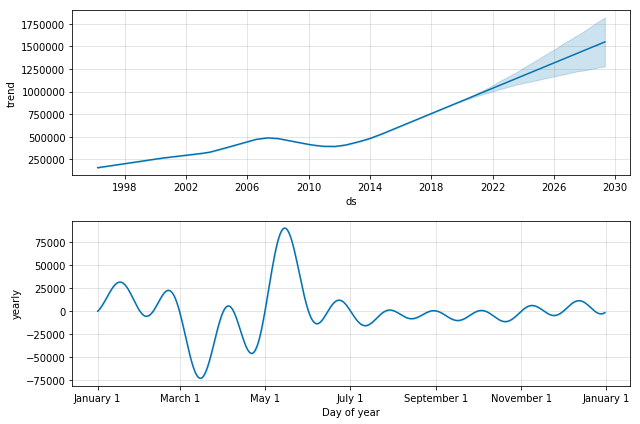

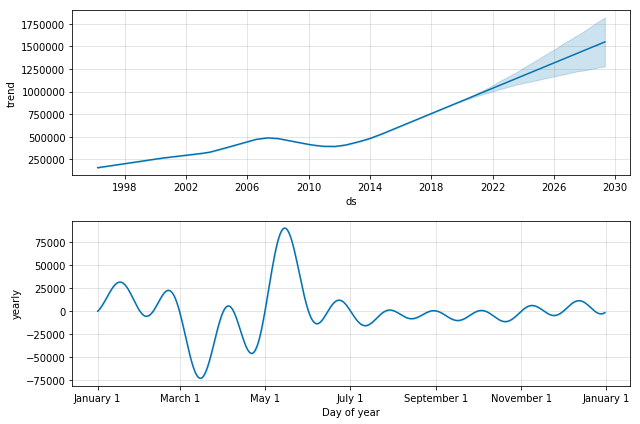

In [15]:
m.plot_components(forecast)

In [ ]:
# Prophet plot function code
def plot(
    m, fcst, ax=None, uncertainty=True, plot_cap=True, xlabel='ds', ylabel='y',
    figsize=(10, 6)
):
    if ax is None:
        fig = plt.figure(facecolor='w', figsize=figsize)
        ax = fig.add_subplot(111)
    else:
        fig = ax.get_figure()
    fcst_t = fcst['ds'].dt.to_pydatetime()
    ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.')
    ax.plot(fcst_t, fcst['yhat'], ls='-', c='#0072B2')
    if 'cap' in fcst and plot_cap:
        ax.plot(fcst_t, fcst['cap'], ls='--', c='k')
    if m.logistic_floor and 'floor' in fcst and plot_cap:
        ax.plot(fcst_t, fcst['floor'], ls='--', c='k')
    if uncertainty:
        ax.fill_between(fcst_t, fcst['yhat_lower'], fcst['yhat_upper'],
                        color='#0072B2', alpha=0.2)
    ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    fig.tight_layout()
    return fig